In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [2]:
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.shape

(2290, 6)

In [5]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [27]:
# Correlations
correlation = gold_data.corr()

<AxesSubplot:>

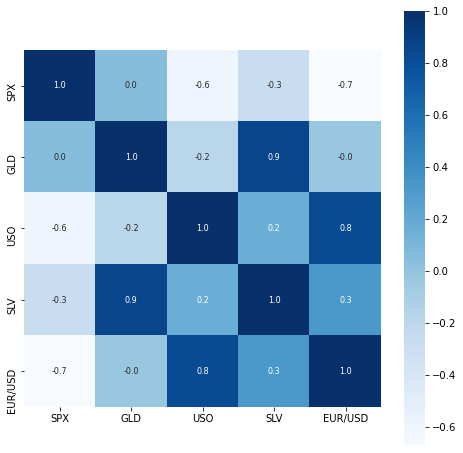

In [32]:
# constructing heap to see correlation
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True,annot_kws={'size':8},cmap='Blues')

In [33]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/Users/skirwai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

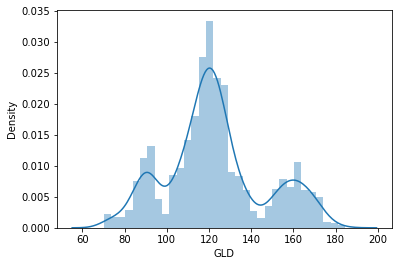

In [34]:
# distribution od gold price
sns.distplot(gold_data['GLD'])

In [36]:
X = gold_data.drop(['GLD', 'Date'], axis=1)
Y = gold_data['GLD']

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2,
                                                   test_size=0.25)

In [38]:
print(X.shape,X_train.shape, X_test.shape)

print(Y.shape,Y_train.shape, Y_test.shape)

(2290, 4) (1717, 4) (573, 4)
(2290,) (1717,) (573,)


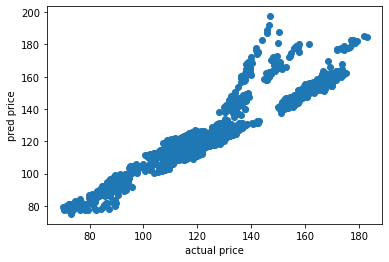

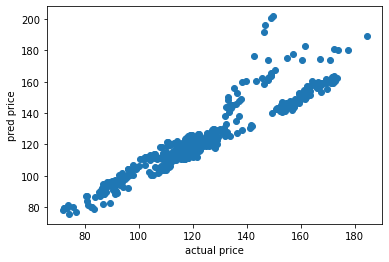

In [39]:
# Linear Regression model
lin_reg = LinearRegression()

lin_reg.fit(X_train,Y_train)

pred_train = lin_reg.predict(X_train)

error_score= metrics.r2_score(pred_train, Y_train)
error_score

# visual predicted prices
plt.scatter(Y_train, pred_train)
plt.xlabel('actual price')
plt.ylabel('pred price')
plt.show()

pred_test = lin_reg.predict(X_test)

error_score_test= metrics.r2_score(pred_test, Y_test)
error_score_test

# visual predicted prices
plt.scatter(Y_test, pred_test)
plt.xlabel('actual price')
plt.ylabel('pred price')
plt.show()


In [40]:
error_score, error_score_test

(0.8685680502538071, 0.8616719040803691)

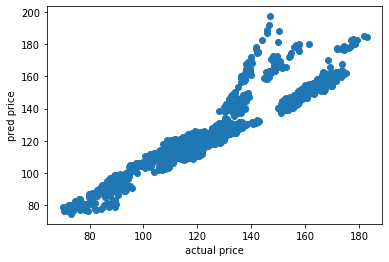

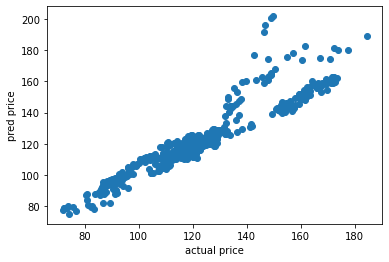

In [41]:

# Lasso Regression
lass_reg = Lasso()
lass_reg.fit(X_train, Y_train)

pred_train = lass_reg.predict(X_train)

error_score= metrics.r2_score(pred_train, Y_train)
error_score


# visual predicted prices
plt.scatter(Y_train, pred_train)
plt.xlabel('actual price')
plt.ylabel('pred price')
plt.show()

pred_test = lass_reg.predict(X_test)

error_score_test= metrics.r2_score(pred_test, Y_test)
error_score_test



# visual predicted prices
plt.scatter(Y_test, pred_test)
plt.xlabel('actual price')
plt.ylabel('pred price')
plt.show()



In [42]:
error_score, error_score_test

(0.8657826203325536, 0.8587552348375038)

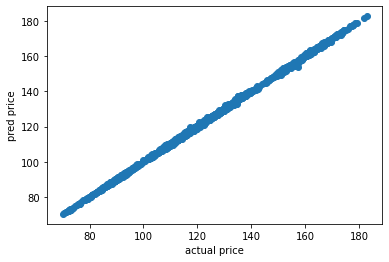

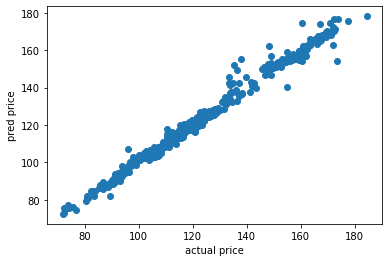

0.9996158537037589

In [43]:
from xgboost import XGBRegressor

#loading model
model = XGBRegressor()

model.fit(X_train, Y_train)


pred_train = model.predict(X_train)

error_score= metrics.r2_score(pred_train, Y_train)
error_score


# visual predicted prices
plt.scatter(Y_train, pred_train)
plt.xlabel('actual price')
plt.ylabel('pred price')
plt.show()

pred_test = model.predict(X_test)

error_score_test= metrics.r2_score(pred_test, Y_test)
error_score_test



# visual predicted prices
plt.scatter(Y_test, pred_test)
plt.xlabel('actual price')
plt.ylabel('pred price')
plt.show()

error_score_test

error_score

In [44]:
error_score, error_score_test

(0.9996158537037589, 0.9856912005214382)

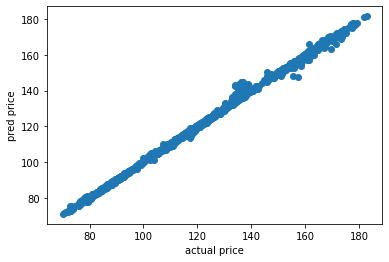

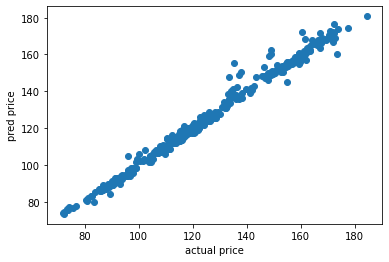

In [45]:


#loading model
reg_model = RandomForestRegressor(n_estimators=100)

reg_model.fit(X_train, Y_train)


pred_train = reg_model.predict(X_train)

error_score= metrics.r2_score(pred_train, Y_train)
error_score


# visual predicted prices
plt.scatter(Y_train, pred_train)
plt.xlabel('actual price')
plt.ylabel('pred price')
plt.show()

pred_test = reg_model.predict(X_test)

error_score_test= metrics.r2_score(pred_test, Y_test)
error_score_test



# visual predicted prices
plt.scatter(Y_test, pred_test)
plt.xlabel('actual price')
plt.ylabel('pred price')
plt.show()


In [47]:
error_score_test,error_score

(0.9888094088475405, 0.9982160367204781)

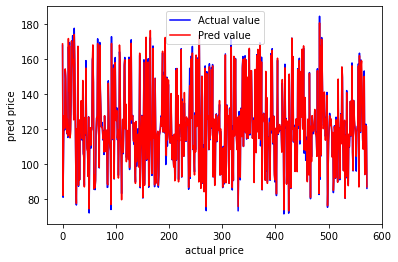

In [48]:
plt.plot(list(Y_test), color='blue', label='Actual value')
plt.plot(pred_test, color='red', label='Pred value')
plt.xlabel('actual price')
plt.ylabel('pred price')
plt.legend()